In [7]:
import os
import glob
import collections
import subprocess as sp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
from networkx.classes.multidigraph import MultiDiGraph
from networkx.drawing.nx_agraph import read_dot, write_dot, graphviz_layout

import stats
import graphs
import sqlite_helper as helper

In [8]:
# Needs to be done when there are changes in these files ...
import importlib
importlib.reload(helper)
importlib.reload(stats)
importlib.reload(graphs)
print("Updates imports")

Updates imports


# Helper functions

In [14]:
def get_name_from_dot(path):
    # Remove last dot, remove last 3 "_" which are hardcoded
    return path.split("/")[-1].rsplit(".", 1)[0].rsplit("_", 3)[0]

def get_name_from_db_bench(name):
    return name.replace("/", "-")

# Load Tag Data

In [9]:
db_path_tags = "/Users/christopher/Uni/MasterThesis/experiment_4_roaring/measurements.db"
measurements_tags = helper.get_all_measurements(db_path_tags)
grouped_by_tag = helper.group_measurements_by_property(measurements_tags, -2)

# Group by benchmark within tags
for tag in grouped_by_tag.keys():
    
    grouped_by_tag[tag] = helper.group_measurements_by_property(grouped_by_tag[tag], -3)

In [10]:
# Add seperately loaded tag data
db_path = "/Users/christopher/Uni/MasterThesis/experiment_4_roaring/stopped_exp.db"
m1 = helper.get_all_measurements(db_path)
grouped_by_tag_single = helper.group_measurements_by_property(m1, -1)

# Group by benchmark within tags
for tag in grouped_by_tag_single.keys():
    grouped_by_tag_single[tag] = helper.group_measurements_by_property(grouped_by_tag_single[tag], -2)

In [11]:
# Add single
grouped_by_tag["v1.3.0"] = grouped_by_tag_single["v1.3.0"]

v1.2.0 BenchmarkChecksum/checksum-1 1.0365681067322148
v1.2.0 BenchmarkChecksum/checksum-16 2.721061568794518
v1.2.0 BenchmarkChecksum/checksum-compressed-262144 1.4489034980367466


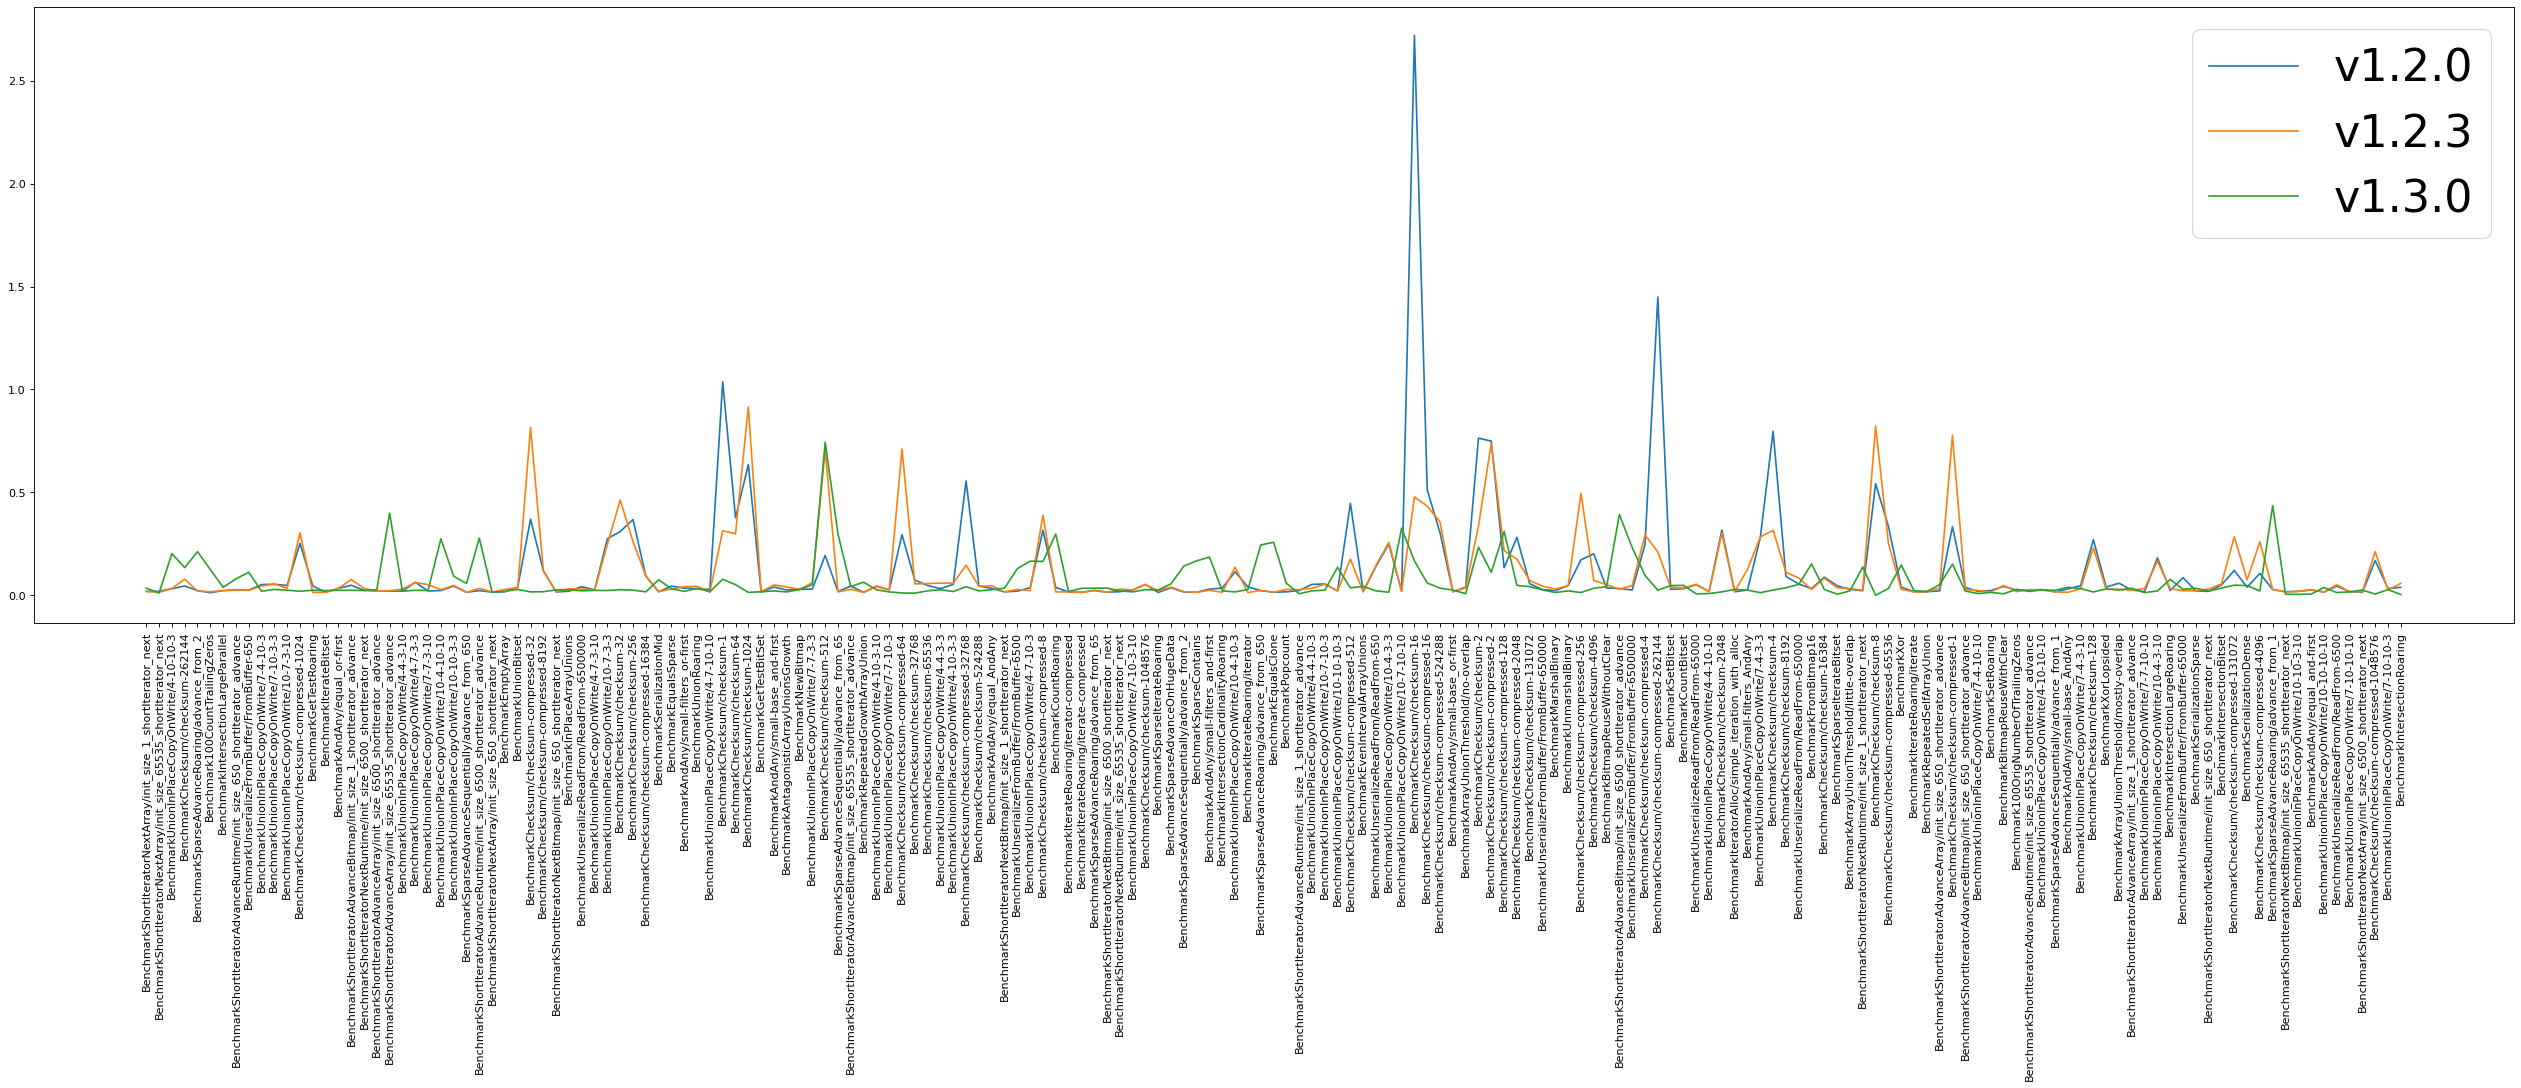

In [16]:
unstable_benchmarks = []

plt.figure(figsize=(40, 10), dpi=80)

labels=list(next(iter(grouped_by_tag.values())).keys())
plt.xticks([x for x in range(len(labels))], labels, rotation='vertical')

for tag in grouped_by_tag.keys():
    cv = []
    spread = []
    for bench in grouped_by_tag[tag].keys():
        x = []
        measurments = grouped_by_tag[tag][bench]
        for entry in measurments:
            x.append(entry[2])
        current_cv = stats.cv(x)
        cv.append(current_cv)
        if (current_cv) > 1:
            print(f"{tag} {bench} {current_cv}")
            unstable_benchmarks.append(get_name_from_db_bench(bench))
        spread.append(stats.max_spread(x))

    plt.plot(cv, label=tag)
plt.legend(fontsize="40")
plt.show()

In [17]:
unstable_benchmarks

['BenchmarkChecksum-checksum-1',
 'BenchmarkChecksum-checksum-16',
 'BenchmarkChecksum-checksum-compressed-262144']

BenchmarkMarshal/SimpleDocument/map [790.1, 784.9, 780.8, 785.4, 788.3, 784.6]
BenchmarkMarshal/SimpleDocument/map [760.0, 761.2, 763.7, 758.2, 758.8, 761.7, 777.5, 767.1, 770.4, 769.1, 774.4, 766.7, 765.7, 762.2, 763.0, 777.7, 768.2, 774.6]
BenchmarkMarshal/SimpleDocument/map [765.7, 791.9, 763.9, 755.0, 762.8, 761.6, 758.5, 760.9, 755.2, 760.3, 1567.0, 756.1, 759.2, 768.4, 757.0, 768.1, 767.1, 757.6]


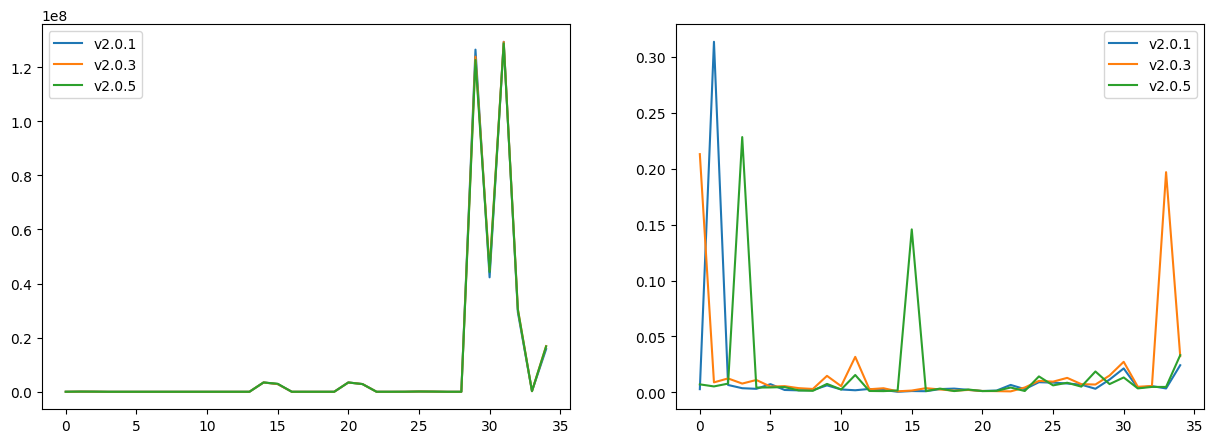

In [235]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

for tag in [group_201, group_203, group_205]:
    cv = []
    mean = []
    max = []
    od = collections.OrderedDict(sorted(tag.items()))
    for idx, (k, data) in enumerate(od.items()):
        x = []
        for entry in data:
            x.append(entry[2])
        cv.append(stats.cv(x))
        mean.append(np.mean(x))
        max.append(np.max(x))

        if idx == 3:
            print(k, x)

    axs[0].plot(mean, label=data[0][-1])
    axs[1].plot(cv, label=data[0][-1])

axs[0].legend()
axs[1].legend()
plt.show()

In [172]:
od = collections.OrderedDict(sorted(group_203.items()))
for k, v in od.items(): print(k, v)

BenchmarkMarshal/HugoFrontMatter [(205, 102288, 11455.0, 1, 3, 2, 3, 1, 1, 1, 1, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (206, 102176, 11603.0, 1, 3, 2, 3, 1, 2, 1, 1, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (207, 99442, 11464.0, 1, 3, 2, 3, 1, 3, 1, 1, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (208, 101880, 11421.0, 1, 3, 2, 3, 1, 1, 2, 1, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (209, 101330, 11562.0, 1, 3, 2, 3, 1, 2, 2, 1, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (210, 102165, 11532.0, 1, 3, 2, 3, 1, 3, 2, 1, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (415, 100142, 11660.0, 1, 3, 2, 3, 1, 1, 1, 2, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (416, 101732, 11526.0, 1, 3, 2, 3, 1, 2, 1, 2, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (417, 100688, 11655.0, 1, 3, 2, 3, 1, 3, 1, 2, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (418, 101935, 11647.0, 1, 3, 2, 3, 1, 1, 2, 2, 'BenchmarkMarshal/HugoFrontMatter', 'v2.0.3'), (419, 99502, 11527.0, 1, 3,

In [47]:
intersect = set()
for tag in grouped_by_tags.keys():
    group_by_bench = helper.group_measurements_by_name(grouped_by_tags[tag], -2)
    print(group_by_bench.keys())
    if intersect.__len__() == 0:
        intersect = set(group_by_bench.keys())
    else:
        intersect = intersect.intersection(set(group_by_bench.keys()))
print(intersect)


dict_keys(['BenchmarkScanComments/1MValid', 'BenchmarkScanComments/10ValidUtf8', 'BenchmarkScanComments/1kValidUtf8', 'BenchmarkScanComments/1MValidUtf8', 'BenchmarkScanComments/10Valid', 'BenchmarkScanComments/1kValid', 'BenchmarkParseLiteralStringValid/10Valid'])
dict_keys(['BenchmarkScanComments/1MValid', 'BenchmarkScanComments/10ValidUtf8', 'BenchmarkScanComments/1kValidUtf8', 'BenchmarkScanComments/1MValidUtf8', 'BenchmarkScanComments/10Valid', 'BenchmarkScanComments/1kValid', 'BenchmarkParseLiteralStringValid/10Valid'])
dict_keys(['BenchmarkScanComments/1MValid', 'BenchmarkScanComments/10ValidUtf8', 'BenchmarkScanComments/1kValidUtf8', 'BenchmarkScanComments/1MValidUtf8', 'BenchmarkScanComments/10Valid', 'BenchmarkScanComments/1kValid', 'BenchmarkParseLiteralStringValid/10Valid'])
{'BenchmarkScanComments/1MValidUtf8', 'BenchmarkScanComments/1kValidUtf8', 'BenchmarkScanComments/10Valid', 'BenchmarkParseLiteralStringValid/10Valid', 'BenchmarkScanComments/10ValidUtf8', 'BenchmarkSca

# PPROF files

In [18]:
graph_paths0 = "/Users/christopher/Uni/MasterThesis/experiment_4_roaring/instance0/backup-mt-1-instance-0/"
graph_paths1 = "/Users/christopher/Uni/MasterThesis/experiment_4_roaring/instance1/backup-mt-1-instance-1/"

In [20]:
dot_files = []
for graph_paths in [graph_paths0, graph_paths1]:
    # Convert files to dot files for further analysis

    # Clear existing dot files
    for existingDotFile in glob.glob(graph_paths + "*.dot"):
        os.remove(existingDotFile)

    if len(glob.glob(graph_paths + "*.dot")) == 0:
        files = glob.glob(graph_paths + "*")
        for file in files:
            
            if file.endswith(".dot"):
                continue
            
            name = file.split(".out")[0]
            command = f"go tool pprof -nodecount=3000 --nodefraction=0.0 --edgefraction=0.0 -dot {name}.out > {name}.dot"
            stream = os.popen(command)
            output = stream.read()
            

    dot_files.extend(glob.glob(graph_paths + "*.dot"))

In [21]:
len(dot_files)

383

In [22]:
"""Load and convert all graphs, and generate a unique node mapping."""
count_bad_input = 0
ordered_graphs = {}
none_perf_benchs = []
removed_node_name = set()
for dot_file in dot_files:
    name = get_name_from_dot(dot_file)

    if "BenchmarkSize" in name or "BenchmarkMemory" in name:
        none_perf_benchs.append(name)
        continue
    
    try:
        curr_graph = read_dot(dot_file)
        curr_graph = graphs.convertWeigthsToFloat(curr_graph)
    except ValueError: 
        count_bad_input += 1
        print(dot_file.split("/")[-1])
        continue

    # Removing starting nodes like file, type etc.
    try:
        name_first_node = list(curr_graph.nodes(data=True))[0][0]
        if name_first_node != "N1":
            removed_node_name.add(name_first_node)
            curr_graph.remove_node(name_first_node)
    except Exception as e:
        print(e)

    # Add all graphs from the same benchmark together and later form the union
    try: 
        ordered_graphs[name].append(curr_graph)
    except KeyError:
       ordered_graphs[name] = []
       ordered_graphs[name].append(curr_graph)


print(f"Bad input: {count_bad_input}")
print(f"None perf benchmarks: {none_perf_benchs}")
print(f"Removed node names: {removed_node_name}")

Bad input: 0
None perf benchmarks: ['05-28-2023_BenchmarkSizeRoaring', '05-28-2023_BenchmarkMemoryUsage', '05-28-2023_BenchmarkSizeBitset', '05-28-2023_BenchmarkSizeRoaring', '05-28-2023_BenchmarkMemoryUsage', '05-28-2023_BenchmarkSizeBitset']
Removed node names: {'File: roaring.test', 'File: roaring64.test', 'Type: cpu'}


In [23]:
all_graphs = [val for sublist in ordered_graphs.values() for val in sublist]
nameMappingFull = graphs.generateUniqueNodeMapping(all_graphs)

In [24]:
final_graphs = []
for keys in ordered_graphs.keys():
    
    if len(ordered_graphs[keys]) != 2:
        print(keys, len(ordered_graphs[keys]))

    union_graphs = []
    for graph in ordered_graphs[keys]:
        mapping = graphs.getNodeNameMapping(graph)
        
        nodeMapping = {}
        # get node name by value
        for key in mapping:
            nodeMapping[key] = nameMappingFull[mapping[key]]

        union_graphs.append(nx.relabel_nodes(graph, nodeMapping))

    final_graphs.append(nx.compose_all(union_graphs))

06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-4-10-3-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-4-7-3-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-10-3-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-4-10-3-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-4-7-10-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-7-10-3-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-4-4-3-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-4-4-10-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-7-4-10-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-7-4-3-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-10-3-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-7-7-3-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-7-10-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-4-10-3 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-4-4-10-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-4-10-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-10-10-10 1
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-7-4-10-3 

In [30]:
len(final_graphs)

207

In [31]:
""" Generate full graph, position and labels."""
labeldict = {v: k for k, v in nameMappingFull.items()}
full_graph = nx.compose_all(final_graphs)
pos_full = graphviz_layout(full_graph, prog='dot')

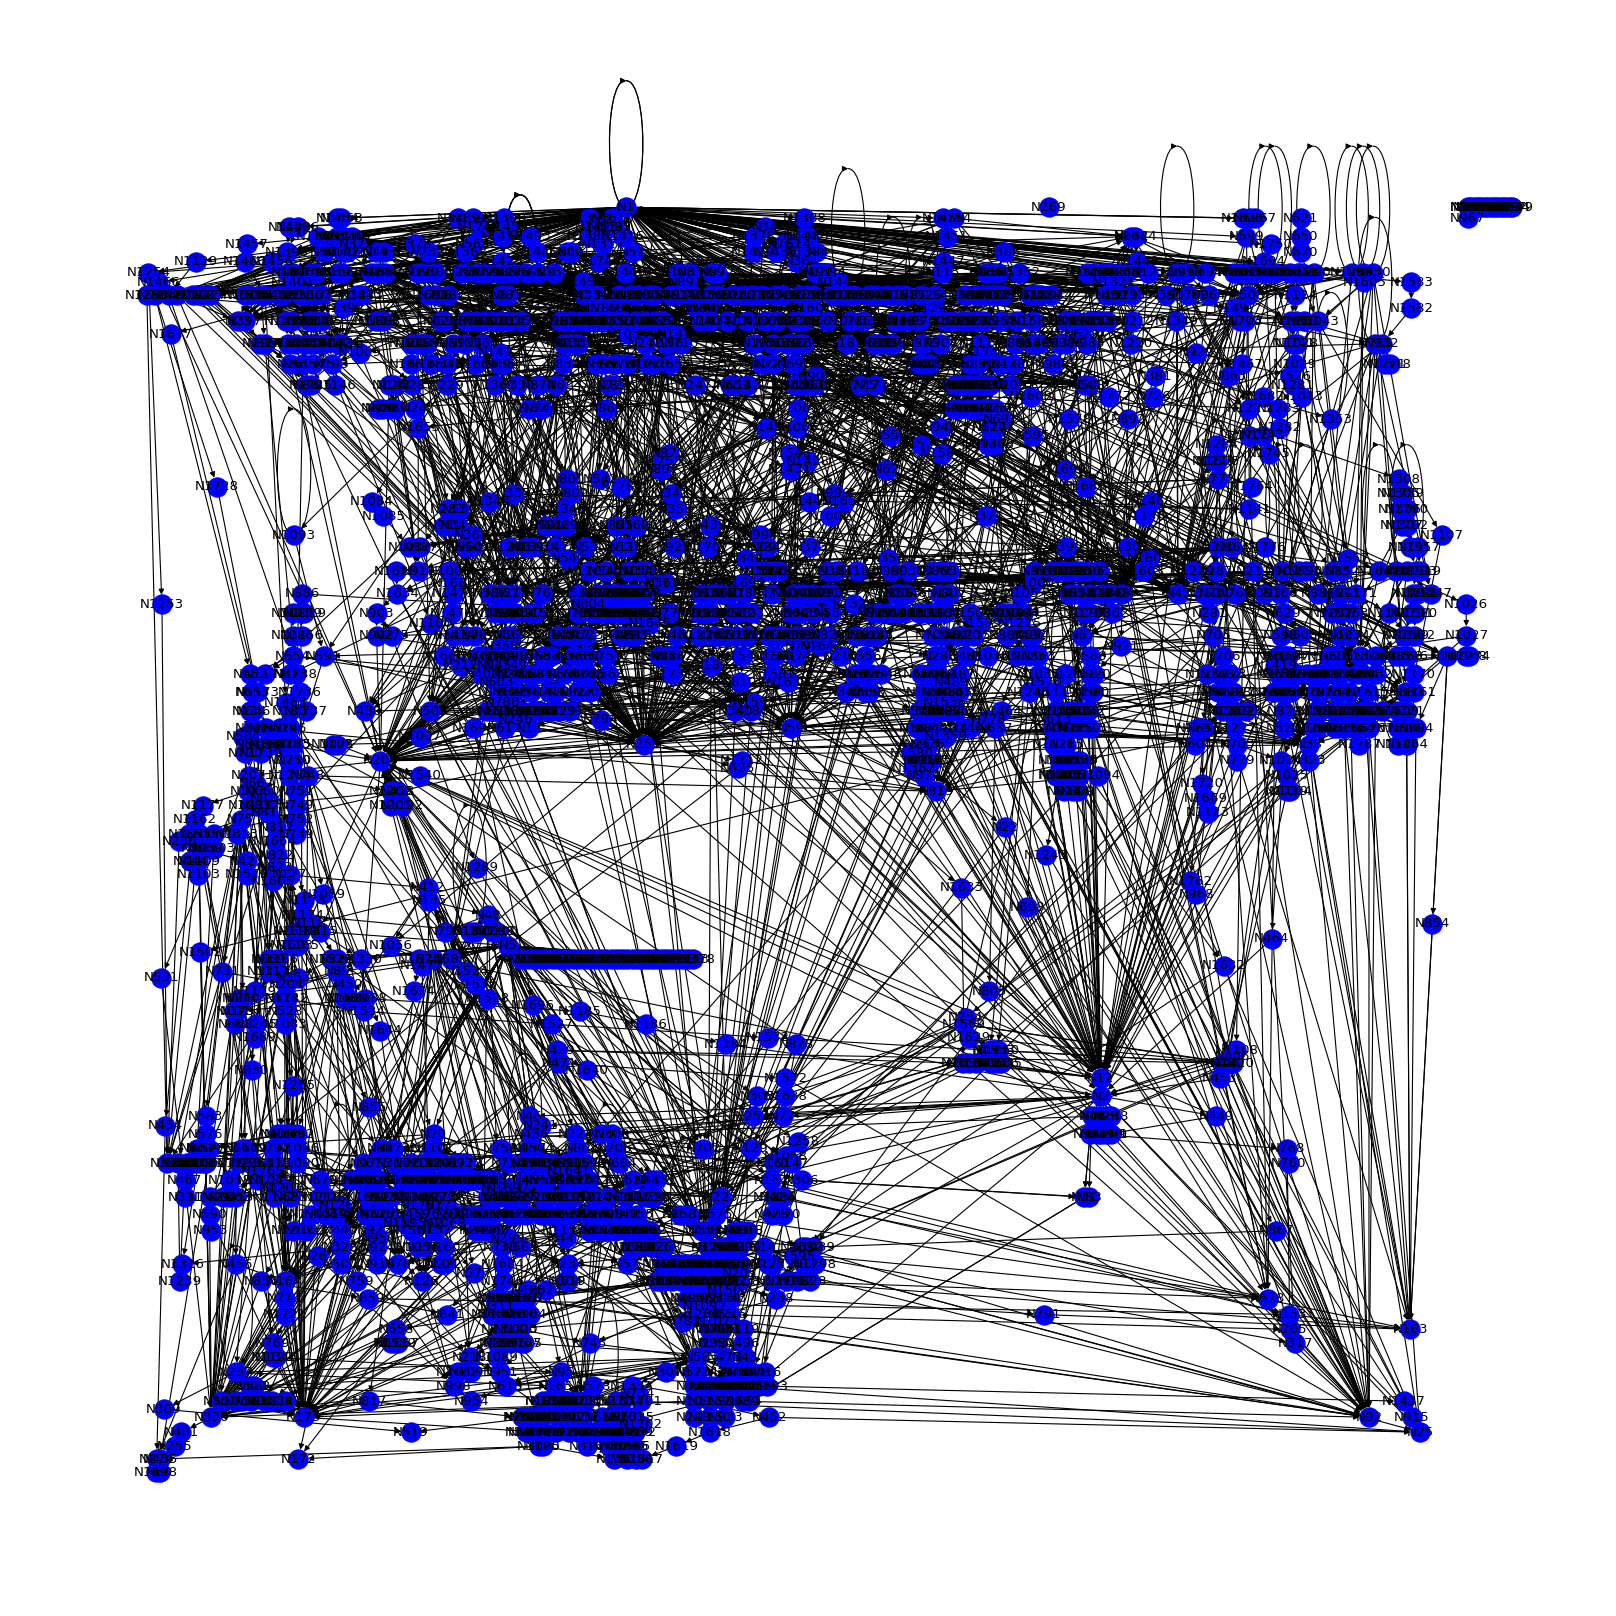

In [32]:
plt.figure(figsize=(20, 20), dpi=80)
nx.draw(full_graph, pos_full, with_labels=labeldict, arrows=True, node_color="blue")
plt.show()

In [ ]:
plt.figure(figsize=(20, 20), dpi=80)
nx.draw(final_graphs[4], pos_full, with_labels=labeldict, arrows=True, node_color="blue")
plt.show()

# 1. Reduce Suite

1. Remove all benchmarks which are not performance benchmarks
2. Remove all failed benchmarks
2. Remove all benchmarks which are unstable
3. Reduce Suite
4. Sort Suite by stability and coverage

In [42]:
# Remove unstable nodes where dotfile name is same as db measurement
unused_graphs = []
for idx, graph in enumerate(final_graphs):
    
    
    if list(ordered_graphs.keys())[idx].rsplit("_", 1)[1] in unstable_benchmarks:
        print("Removing unstable benchmark", list(ordered_graphs.keys())[idx])
        continue

    unused_graphs.append(graph)

print(f"Before: {len(final_graphs)}, Now: {len(unused_graphs)}")

Removing unstable benchmark 05-28-2023_BenchmarkChecksum-checksum-compressed-262144
Removing unstable benchmark 05-28-2023_BenchmarkChecksum-checksum-1
Removing unstable benchmark 05-28-2023_BenchmarkChecksum-checksum-16
Before: 207, Now: 204


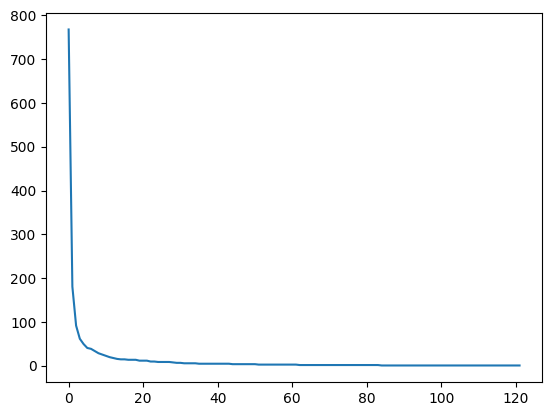

In [43]:
"""Take graphs with highest coverage and remove them from the remaining graphs."""
reduce_graphs_nodes = []
remaining_graph = full_graph.copy()
unused_graphs = final_graphs.copy()
coverage_information = {}
iterations = 0

while len(remaining_graph.nodes()) > 1:
    
    # Find highest coverage within the unused benchmark graphs
    highest_coverage = (0, 0)
    
    for idx, benchmark_graph in enumerate(unused_graphs):  

        overlap_nodes = np.intersect1d(list(benchmark_graph.nodes()), list(remaining_graph.nodes()))
        overlap = len(overlap_nodes)

        # if overlap == highest_coverage[1] and overlap > 0:
        #     print(f"Remaining: {len(remaining_graph.nodes())} - Overlap between {idx} and {highest_coverage[0]}: {overlap}")

        if overlap > highest_coverage[1]:
            highest_coverage = (idx, overlap)
        
        if iterations == 0:
            coverage_information[list(ordered_graphs.keys())[idx]] = overlap

    
    # if iterations % 20  == 0:
    #     plt.figure(figsize=(20, 20), dpi=80)
    #     color_map_full = ['blue' if node in remaining_graph.nodes()  else 'green' for node in full_graph.nodes()]
    #     nx.draw(full_graph, pos_full, with_labels=False, arrows=True, node_color=color_map_full)
    #     plt.show()

    if highest_coverage[1] == 0:
        print(f"Failed to find graph with overlap, Remaining: {len(remaining_graph.nodes())}")
        break
    
    reduce_graphs_nodes.append(highest_coverage)
    
    # remove graph from unused graphs and nodes from remaining graph
    used_graph = unused_graphs.pop(highest_coverage[0])
    remaining_graph.remove_nodes_from(used_graph.nodes())
    iterations += 1

plt.plot([x[1] for x in reduce_graphs_nodes])
plt.show()

In [1]:
print(len(final_graphs))
print(len(reduce_graphs_nodes))
print(reduce_graphs_nodes)

NameError: name 'final_graphs' is not defined

In [44]:
# Print removed benchmarks
# TODO [] Index is wrong here as well
for idx, name in enumerate(sorted(ordered_graphs.keys())):
    if idx not in [x[0] for x in reduce_graphs_nodes]:
        print(name)

05-28-2023_Benchmark100OrigNumberOfTrailingZeros
05-28-2023_BenchmarkAndAny-equal_and-first
05-28-2023_BenchmarkAndAny-small-base_AndAny
05-28-2023_BenchmarkAndAny-small-base_and-first
05-28-2023_BenchmarkAndAny-small-base_or-first
05-28-2023_BenchmarkAndAny-small-filters_AndAny
05-28-2023_BenchmarkAndAny-small-filters_or-first
05-28-2023_BenchmarkAntagonisticArrayUnionsGrowth
05-28-2023_BenchmarkArrayUnionThreshold-mostly-overlap
05-28-2023_BenchmarkBitmapReuseWithoutClear
05-28-2023_BenchmarkChecksum-checksum-1
05-28-2023_BenchmarkChecksum-checksum-131072
05-28-2023_BenchmarkChecksum-checksum-16
05-28-2023_BenchmarkChecksum-checksum-2048
05-28-2023_BenchmarkChecksum-checksum-32768
05-28-2023_BenchmarkChecksum-checksum-4
05-28-2023_BenchmarkChecksum-checksum-4096
05-28-2023_BenchmarkChecksum-checksum-512
05-28-2023_BenchmarkChecksum-checksum-524288
05-28-2023_BenchmarkChecksum-checksum-8
05-28-2023_BenchmarkChecksum-checksum-8192
05-28-2023_BenchmarkChecksum-checksum-compressed-16
05-

# 2. Sort by coverage and stability

In [45]:
# TODO index is not correct as it changes !!!
for el in sorted(reduce_graphs_nodes, key=lambda x: x[1], reverse=True):
    print(list(ordered_graphs.keys())[el[0]], el[1])

05-28-2023_BenchmarkUnserializeReadFrom-ReadFrom-6500 768
05-28-2023_BenchmarkSparseAdvanceSequentially-advance_from_2 181
05-28-2023_BenchmarkNexts-nextmany__12.500000% 92
05-28-2023_BenchmarkMarshalBinary 62
05-28-2023_BenchmarkUnserializeReadFrom-ReadFrom-650 50
05-28-2023_BenchmarkSparseAdvanceRoaring-advance_from_65 41
05-28-2023_BenchmarkChecksum-checksum-16384 39
05-28-2023_BenchmarkChecksum-checksum-compressed-1 34
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-10-10-3 29
05-28-2023_BenchmarkShortIteratorAdvanceRuntime-init_size_6500_shortIterator_advance 26
05-28-2023_BenchmarkChecksum-checksum-32 23
05-28-2023_BenchmarkFromBitmap16 20
06-06-2023_BenchmarkUnionInPlaceCopyOnWrite-10-10-3-3 18
05-28-2023_BenchmarkChecksum-checksum-compressed-262144 16
05-28-2023_BenchmarkChecksum-checksum-524288 15
05-28-2023_BenchmarkSparseAdvanceSequentially-advance_from_2 15
05-28-2023_BenchmarkNexts-next__0.097656% 14
05-28-2023_BenchmarkUnserializeFromBuffer-FromBuffer-6500 14
05-28-2023_Be

# [Option] Edge Coverage for self loops

In [25]:
# TODO Check if edge coverage makes a difference
count = 0
for e in full_graph.edges():
    if e[0] == e[1]:
        count += 1
print(f"Self loops: {count}")

Self loops: 45


In [246]:
def get_edge_lists_1d(graph):
    return [e[0] + e[1] for e in graph.edges()]

In [ ]:
"""Take graphs with highest coverage and remove them from the remaining graphs."""
reduce_graphs_nodes = []
remaining_graph = full_graph.copy()
unused_graphs = final_graphs.copy()

while len(remaining_graph.nodes()) > 1:
    
    # Find highest coverage within the unused benchmark graphs
    highest_coverage = (0, 0)
    
    for idx, benchmark_graph in enumerate(unused_graphs):  

        overlap_nodes = np.intersect1d(list(benchmark_graph.nodes()), list(remaining_graph.nodes()))
        overlap = len(overlap_nodes)

        # if overlap == highest_coverage[1] and overlap > 0:
        #     print(f"Remaining: {len(remaining_graph.nodes())} - Overlap between {idx} and {highest_coverage[0]}: {overlap}")

        if overlap > highest_coverage[1]:
            highest_coverage = (idx, overlap)

    
    # if iterations % 20  == 0:
    #     plt.figure(figsize=(20, 20), dpi=80)
    #     color_map_full = ['blue' if node in remaining_graph.nodes()  else 'green' for node in full_graph.nodes()]
    #     nx.draw(full_graph, pos_full, with_labels=False, arrows=True, node_color=color_map_full)
    #     plt.show()

    if highest_coverage[1] == 0:
        print(f"Failed to find graph with overlap, Remaining: {len(remaining_graph.nodes())}")
        break
    
    reduce_graphs_nodes.append(highest_coverage)
    
    # remove graph from unused graphs and nodes from remaining graph
    used_graph = unused_graphs.pop(highest_coverage[0])
    remaining_graph.remove_nodes_from(used_graph.nodes())

plt.plot([x[1] for x in reduce_graphs_nodes])
plt.show()

print(reduce_graphs_nodes)


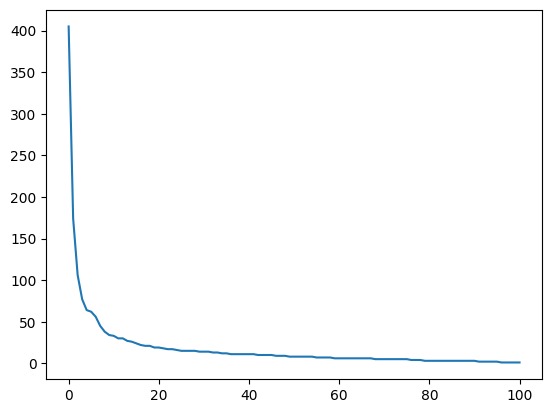

In [247]:
"""Take graphs with highest coverage and remove them from the remaining graphs."""
reduce_graphs_edges = []
remaining_graph = full_graph.copy()
node_overlap = []

while len(remaining_graph.edges()) > 1:
    # get graph with highest coverage
    highest_coverage = (0, 0)
    coverages = []
    for idx, g in enumerate(new_graphs):
        # get overlap with full graph
        overlap_edges = np.intersect1d(get_edge_lists_1d(g), get_edge_lists_1d(remaining_graph))
        overlap = len(overlap_edges)

        if overlap == highest_coverage[1] and overlap > 0:
            #print(f"Remaining: {len(remaining_graph.nodes())} - Overlap between {idx} and {highest_coverage[0]}: {overlap}")
            pass

        if overlap > highest_coverage[1]:
            highest_coverage = (idx, overlap)
            node_overlap.append(overlap)


    if iterations % 20  == 0 and False:
        plt.figure(figsize=(20, 20), dpi=80)
        nx.draw(remaining_graph, pos_full, with_labels=False, arrows=True)
        plt.show()

    
    reduce_graphs_edges.append(highest_coverage)
    remaining_graph.remove_edges_from(new_graphs[highest_coverage[0]].edges())

plt.plot([x[1] for x in reduce_graphs_edges])
plt.show()


In [75]:
# Check if there is a subset of graphs to evaluate reduction potential
for idx1, g1 in enumerate(final_graphs):
    for idx2, g2 in enumerate(final_graphs):
        # check for node overlap
        if idx1 == idx2:
            continue
        
        overlap_nodes = np.intersect1d(list(g1.nodes()), list(g2.nodes()))
        if overlap_nodes.size == len(g1.nodes()) or overlap_nodes.size == len(g2.nodes()):
            print(f"Overlap in nodes: {overlap_nodes.size}, one graph is a subset of the other")

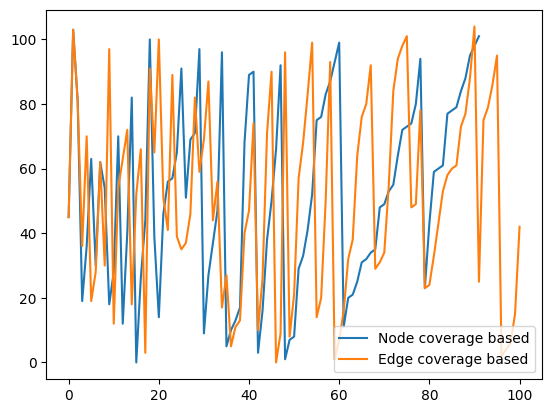

In [249]:
plt.plot([x[0] for x in reduce_graphs_nodes], label="Node coverage based")
plt.plot([x[0] for x in reduce_graphs_edges], label="Edge coverage based")
# plt.plot(node_overlap, label="Edge coverage based node overlap")
plt.legend()

In [250]:
inter = np.intersect1d([x[0] for x in reduce_graphs_nodes], [x[0] for x in reduce_graphs_edges])
len(inter)

92

In [251]:
reduced_new_graphs = new_graphs.copy()
unstable = "BenchmarkMarshal-ReferenceFile-map"
for idx, file in enumerate(dot_files):
    if unstable == get_name_from_dot(file):
        reduced_new_graphs.pop(idx)

No overlap found


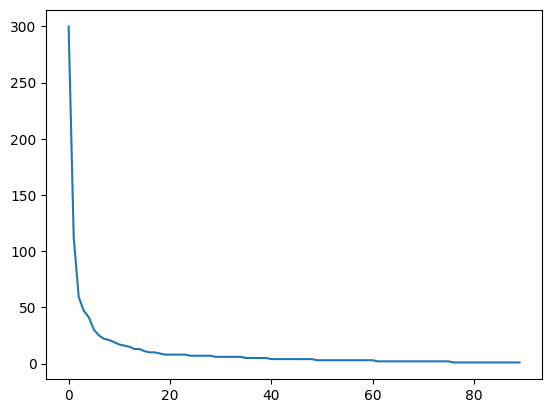

In [252]:
"""Take graphs with highest coverage and remove them from the remaining graphs."""
reduce_graphs_nodes_x = []
highest_coverage: tuple = (0, 0)
remaining_graph = full_graph.copy()
iterations = 0

while len(remaining_graph.nodes()) > 1:
    # get graph with highest coverage
    highest_coverage = (0, 0)
    coverages = []
    for idx, g in enumerate(reduced_new_graphs):
        # get overlap with full graph
        overlap_nodes = np.intersect1d(list(g.nodes()), list(remaining_graph.nodes()))
        overlap = len(overlap_nodes)

        if overlap == highest_coverage[1] and overlap > 0:
            #print(f"Remaining: {len(remaining_graph.nodes())} - Overlap between {idx} and {highest_coverage[0]}: {overlap}")
            pass

        if overlap > highest_coverage[1]:
            highest_coverage = (idx, overlap)

        coverages.append((idx, overlap))
    covs = sorted(coverages, key=itemgetter(1), reverse=True)
    iterations += 1

    if highest_coverage[1] == 0:
        print("No overlap found")
        break
    
    reduce_graphs_nodes_x.append(highest_coverage)
    remaining_graph.remove_nodes_from(reduced_new_graphs[highest_coverage[0]].nodes())

plt.plot([x[1] for x in reduce_graphs_nodes_x])
plt.show()


In [253]:
print(len(reduce_graphs_nodes_x))
print(len(remaining_graph.nodes()))

90
12


In [17]:
[x[1] for x in reduce_graphs_nodes]

NameError: name 'reduce_graphs_nodes' is not defined

In [254]:
inter = np.intersect1d([x[0] for x in reduce_graphs_nodes], [x[0] for x in reduce_graphs_nodes_x])
len(inter)

80

In [255]:
len(reduce_graphs_nodes_x)

90

In [256]:
len(new_graphs)

105

In [257]:
len(full_graph.nodes())

1054

In [258]:
for idx, file in enumerate(dot_files):
    if "BenchmarkMarshal-ReferenceFile-map" in file and "dot" in file:
        print(idx, file)

0 /Users/christopher/Uni/MasterThesis/exp2/instance0/backup-mt-1-instance-0/04-29-2023_BenchmarkMarshal-ReferenceFile-map_2_1_v2-0-1.dot
20 /Users/christopher/Uni/MasterThesis/exp2/instance0/backup-mt-1-instance-0/04-29-2023_BenchmarkMarshal-ReferenceFile-map_3_1_v2-0-1.dot
89 /Users/christopher/Uni/MasterThesis/exp2/instance0/backup-mt-1-instance-0/04-29-2023_BenchmarkMarshal-ReferenceFile-map_1_1_v2-0-1.dot


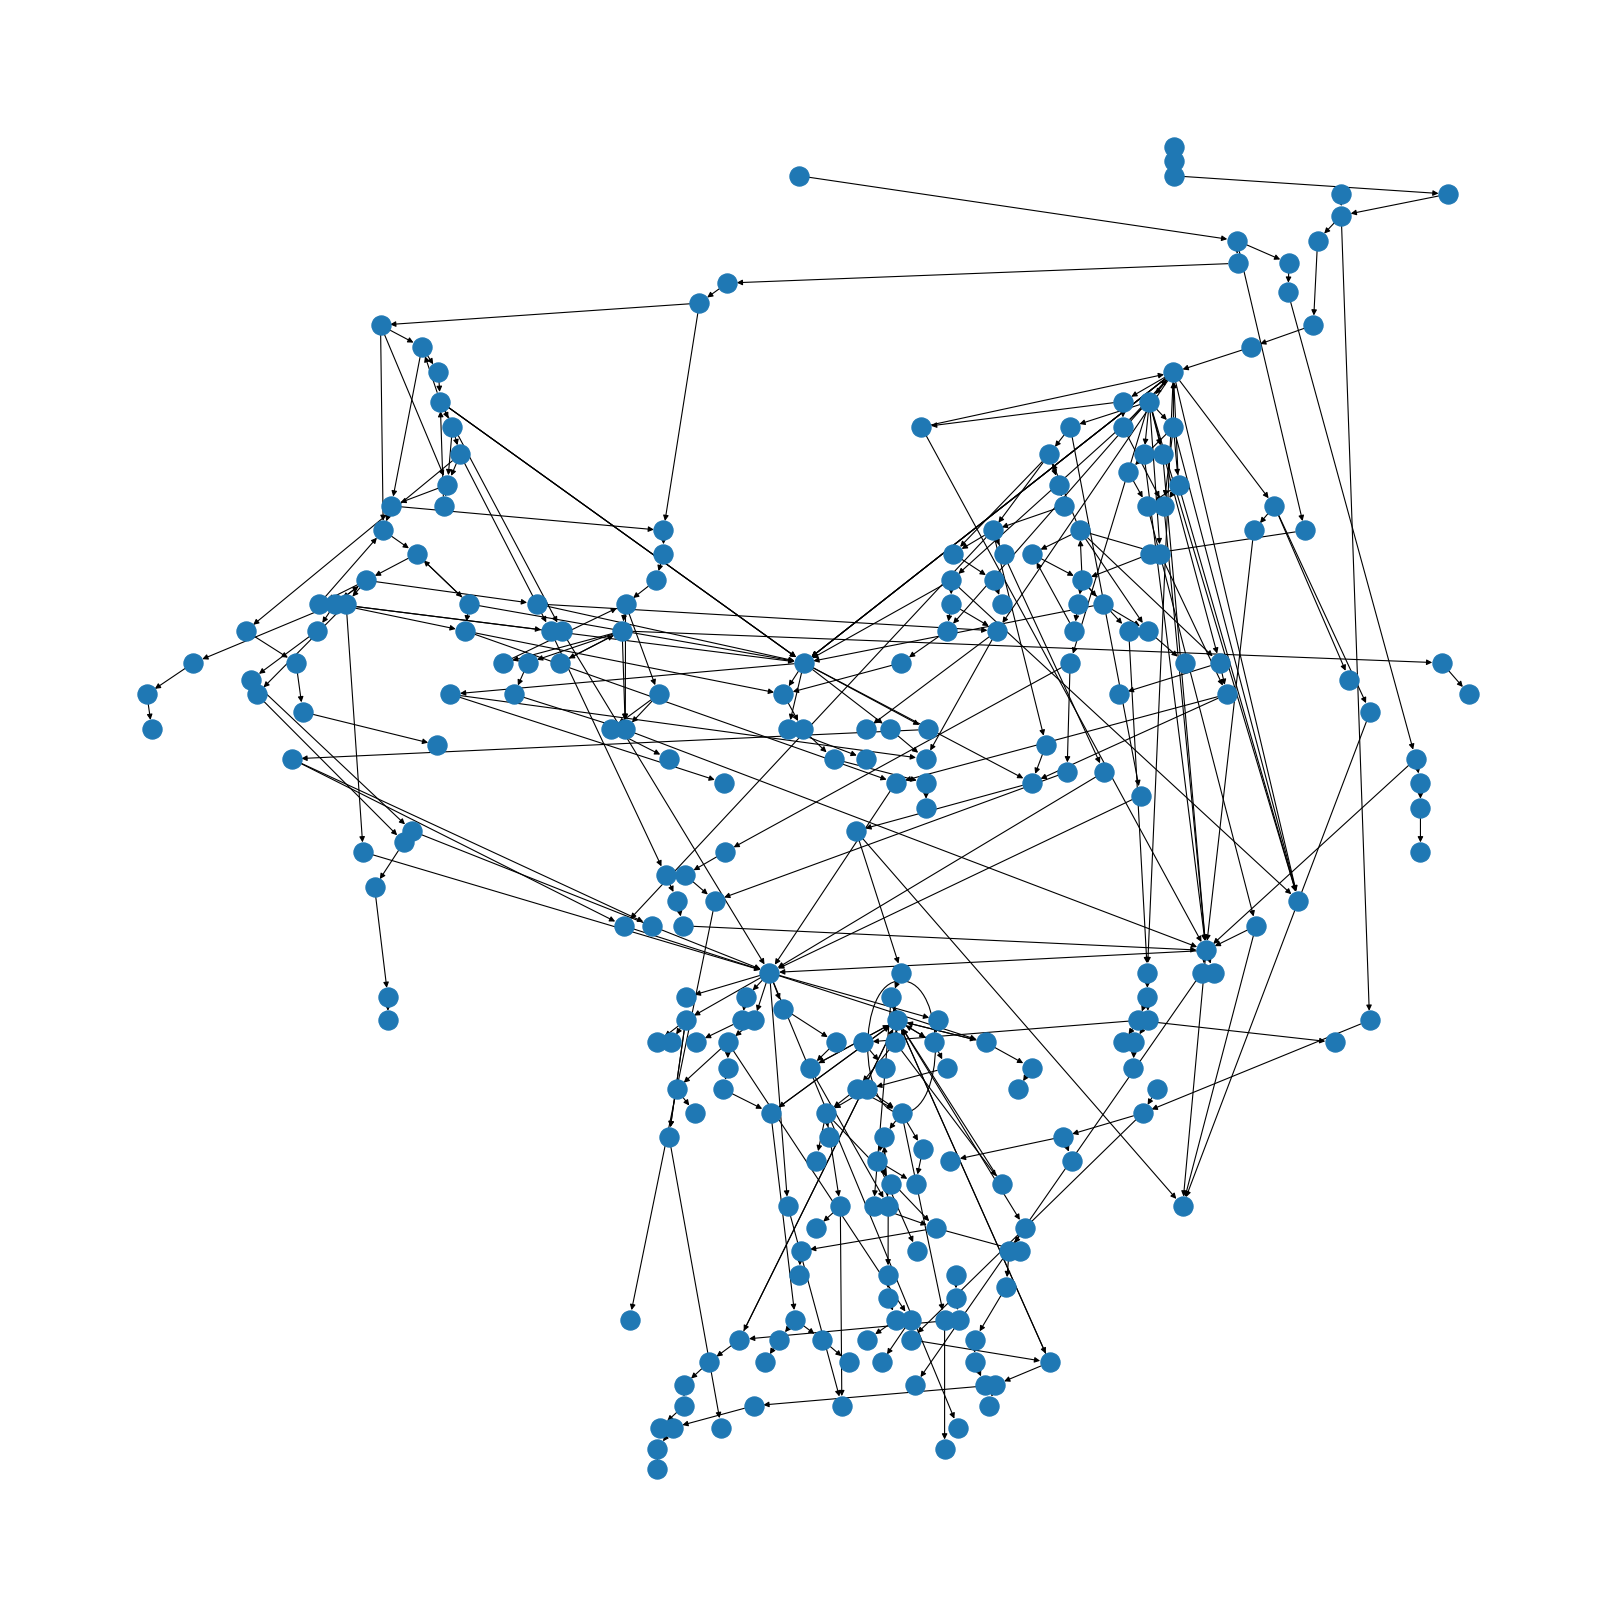

In [259]:
plt.figure(figsize=(20, 20), dpi=80)
nx.draw(new_graphs[0], pos_full, with_labels=False, arrows=True)

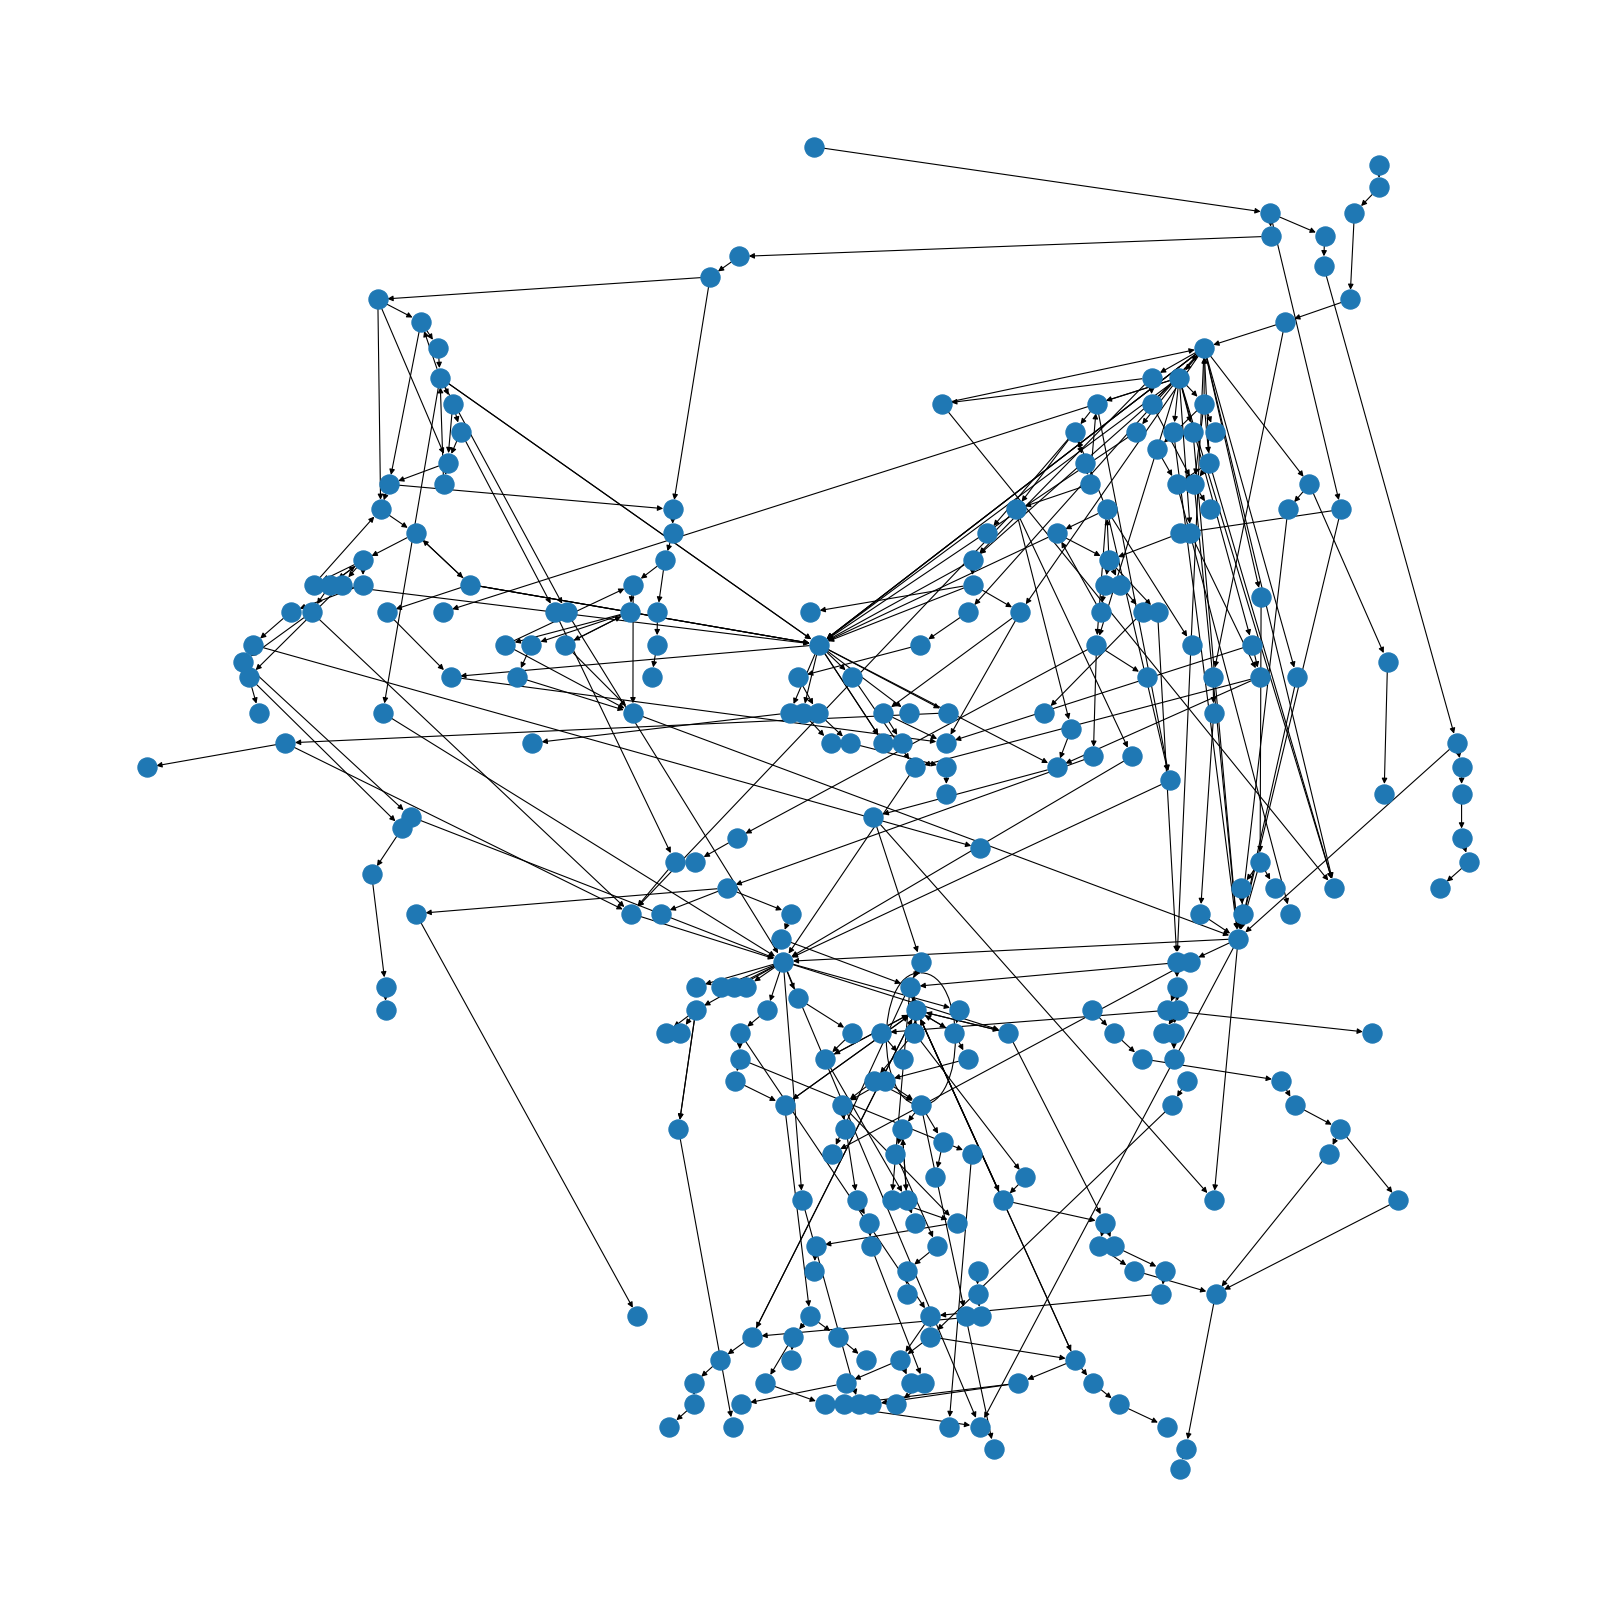

In [260]:
plt.figure(figsize=(20, 20), dpi=80)
nx.draw(new_graphs[20], pos_full, with_labels=False, arrows=True)

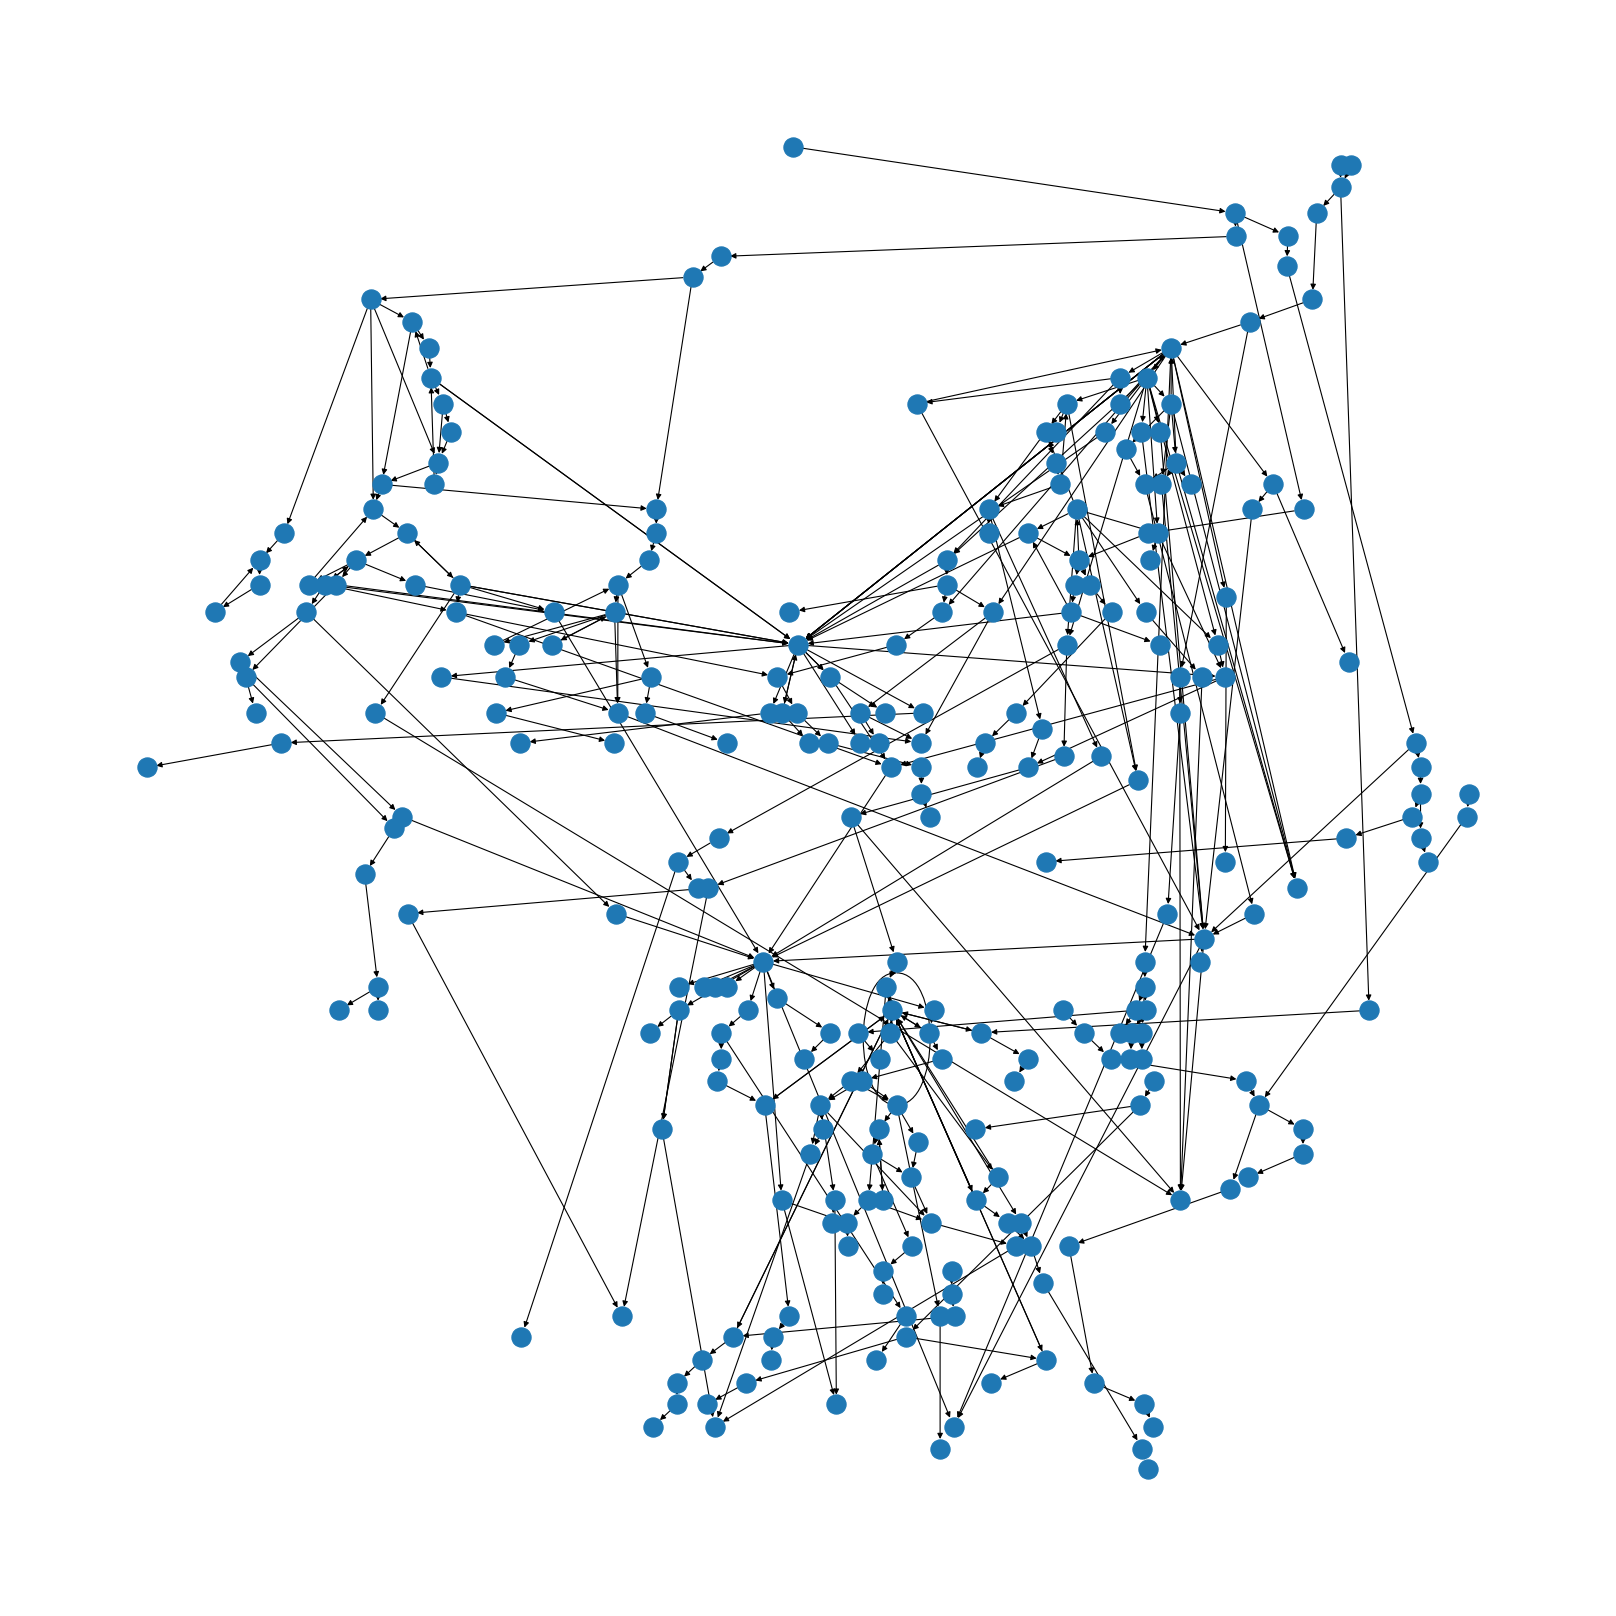

In [261]:
plt.figure(figsize=(20, 20), dpi=80)
nx.draw(new_graphs[89], pos_full, with_labels=False, arrows=True)

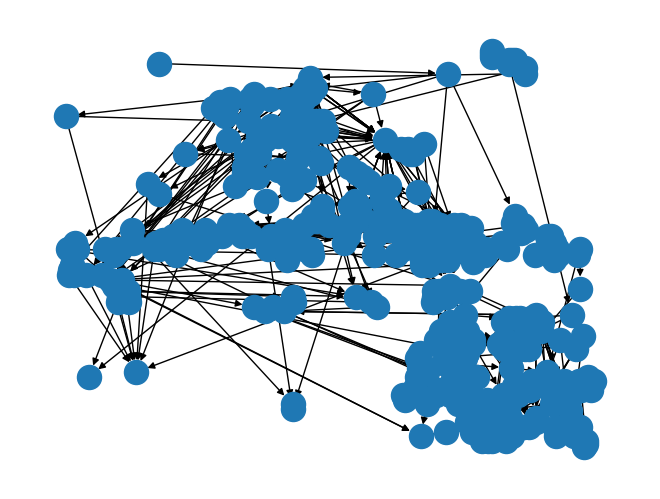

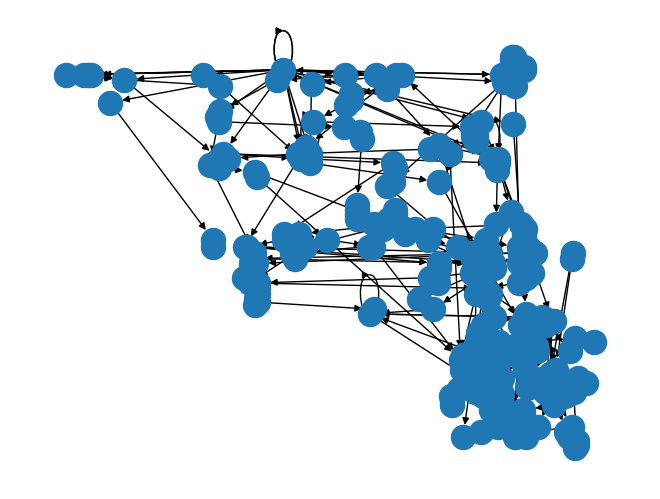

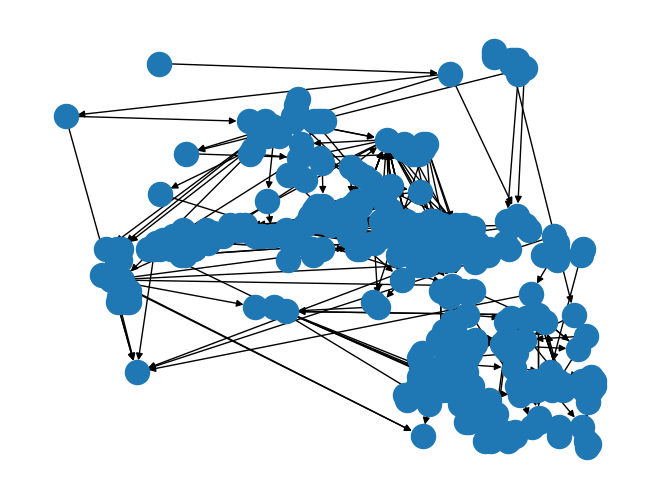

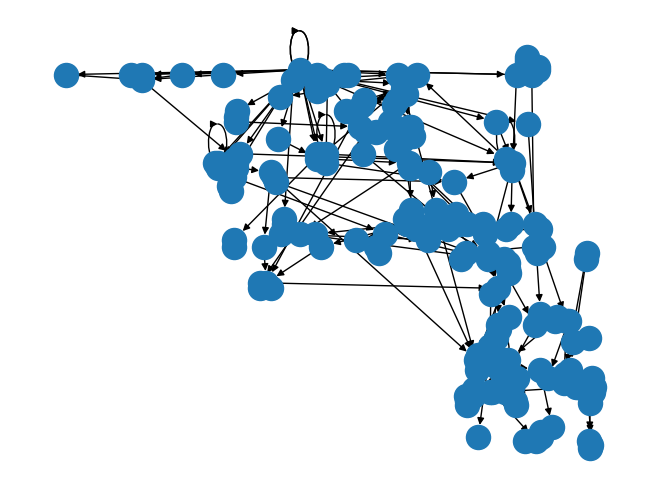

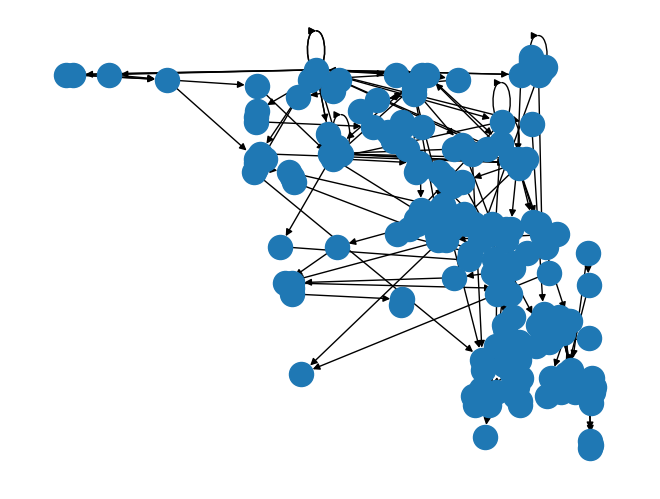

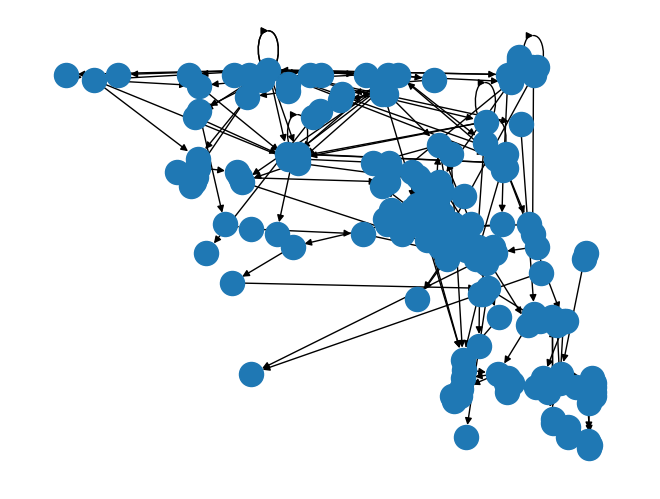

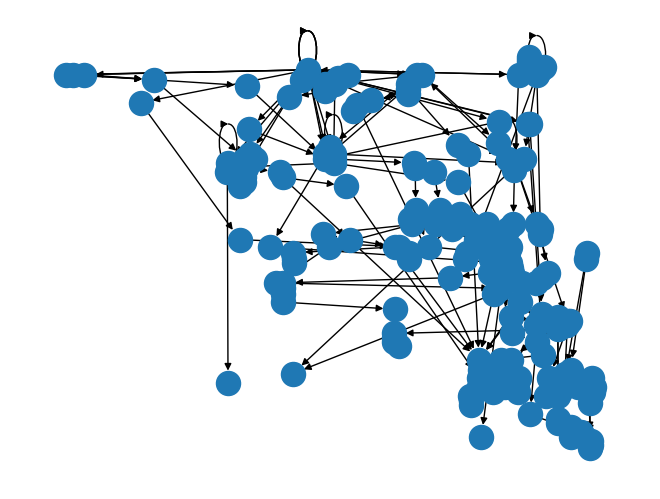

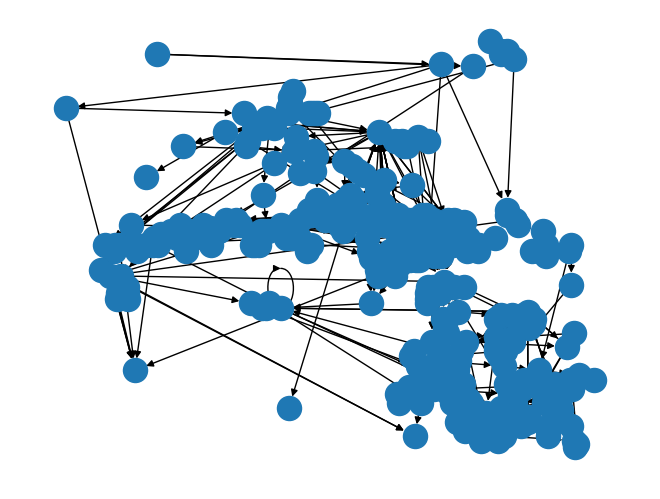

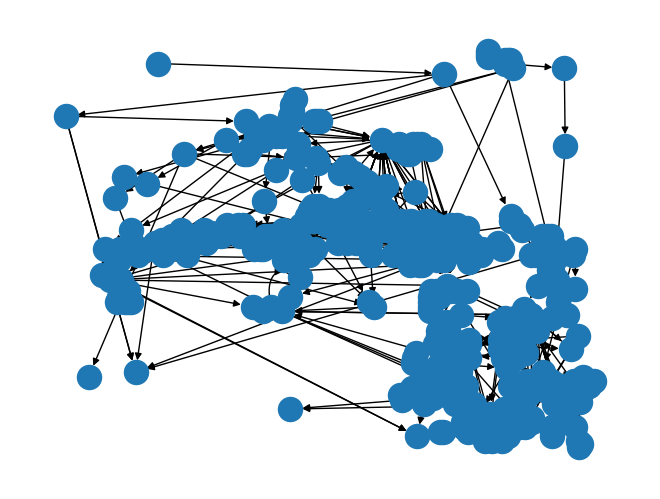

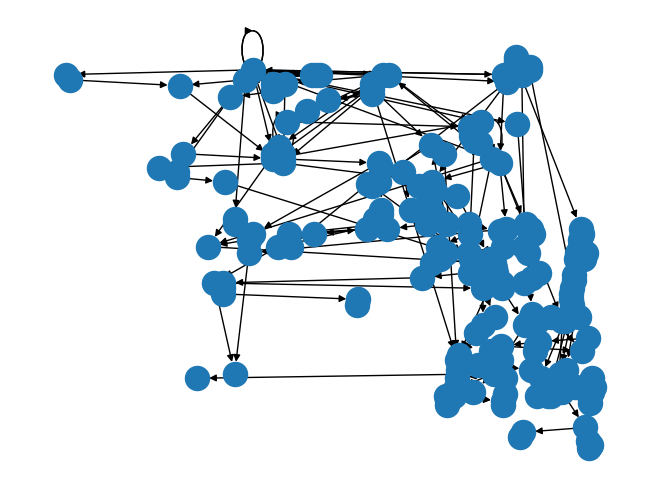

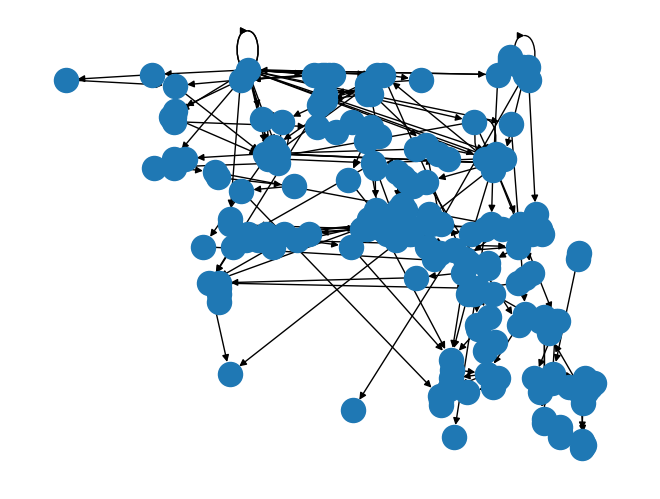

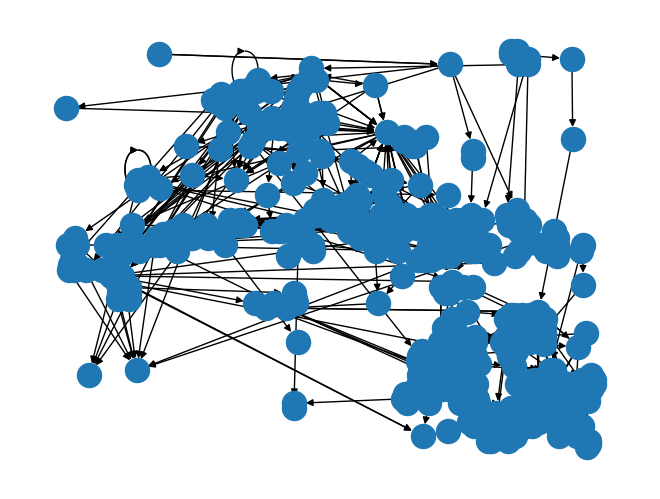

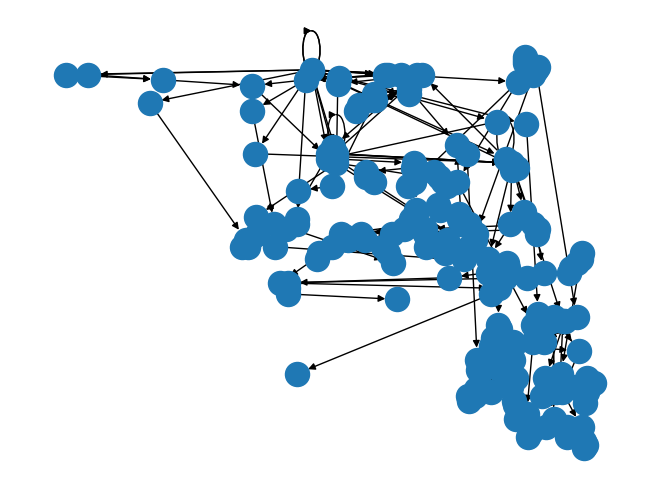

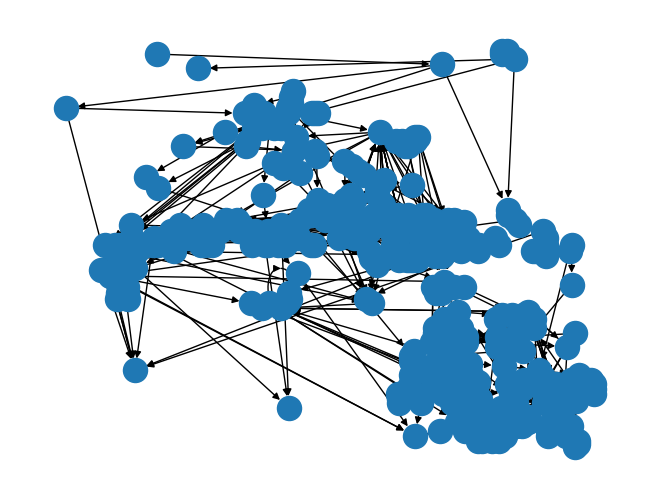

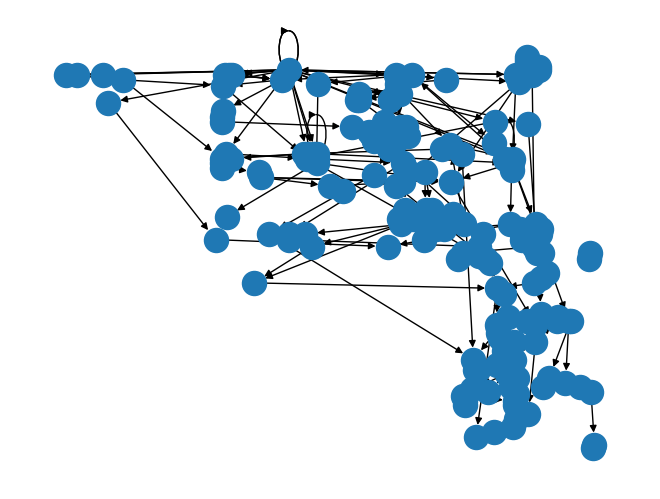

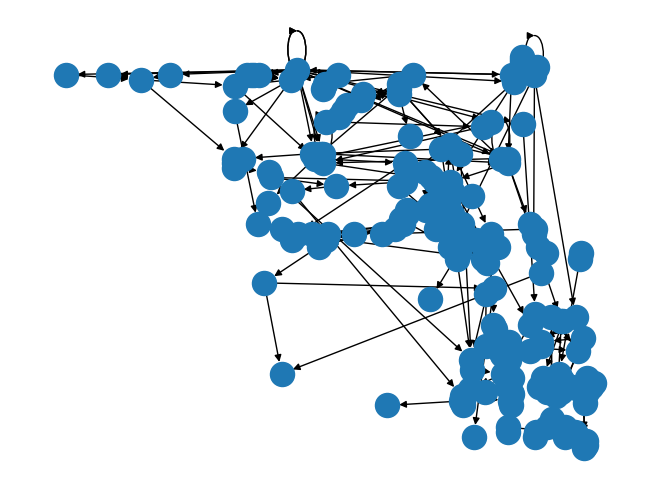

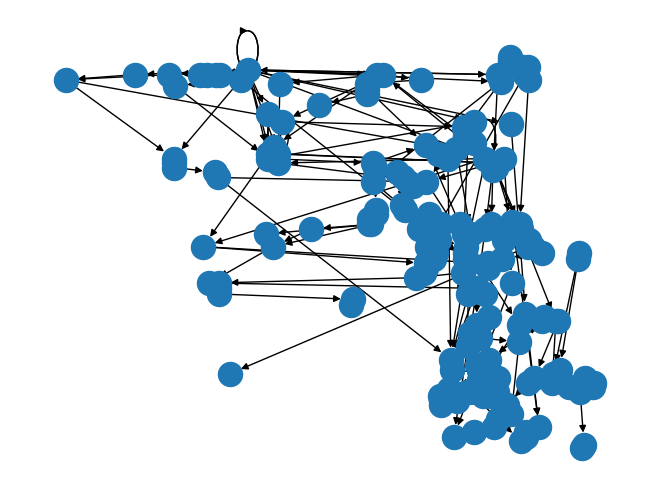

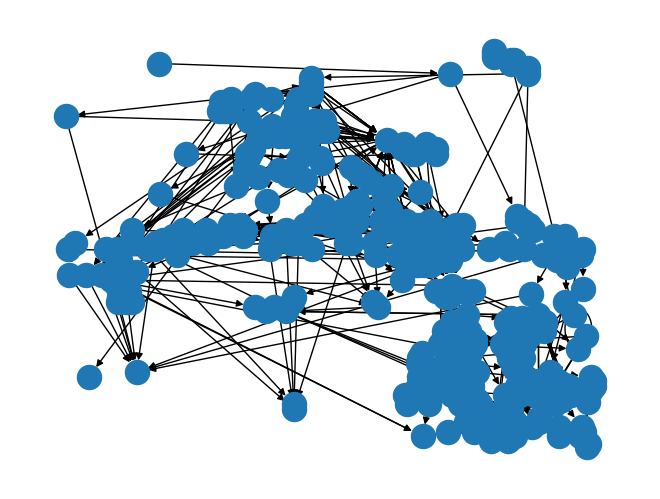

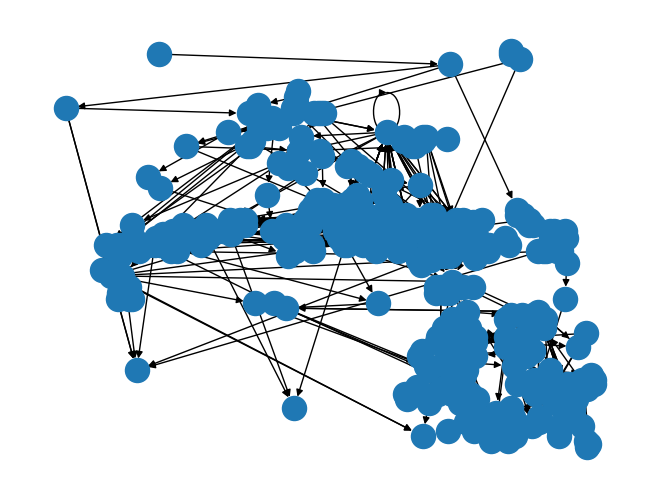

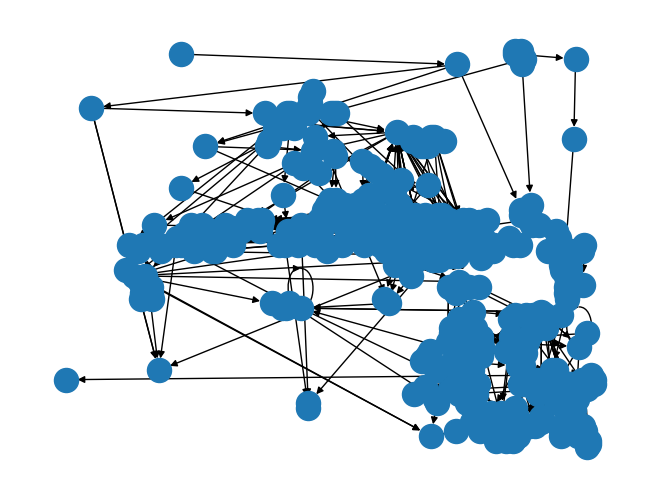

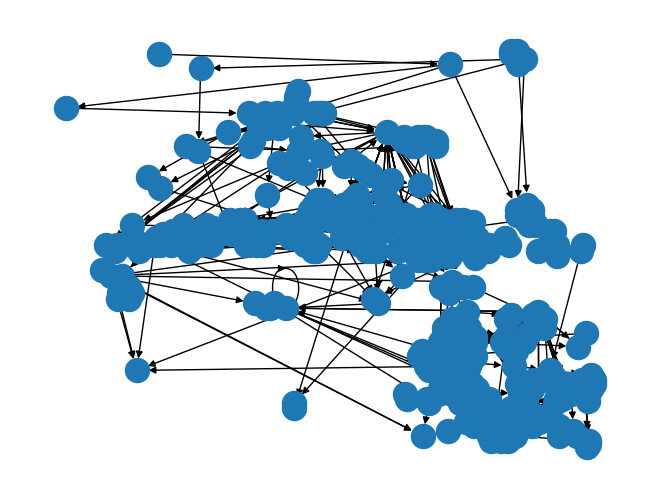

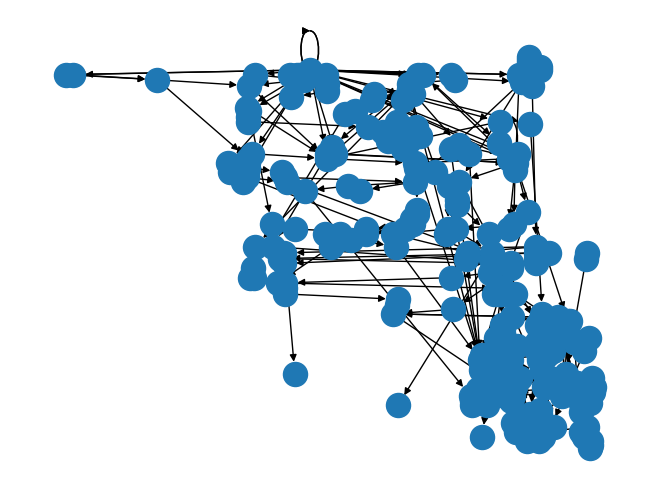

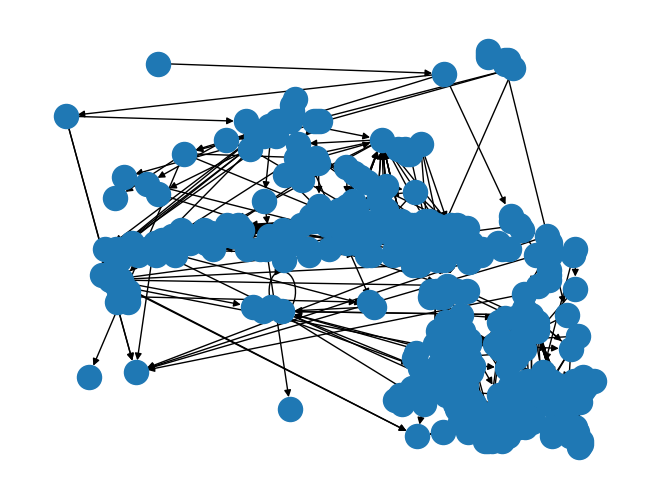

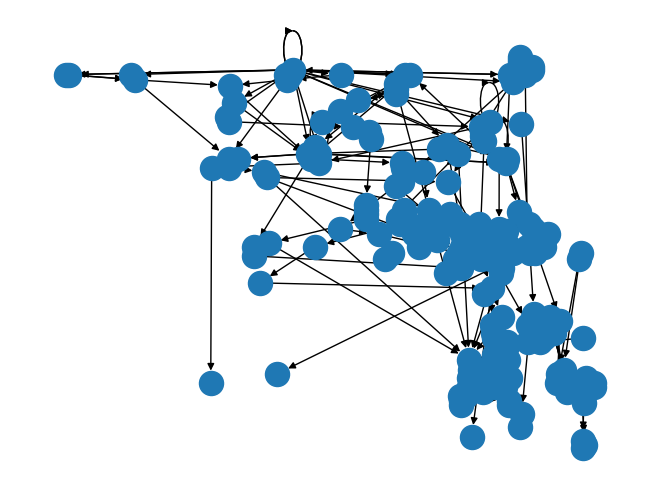

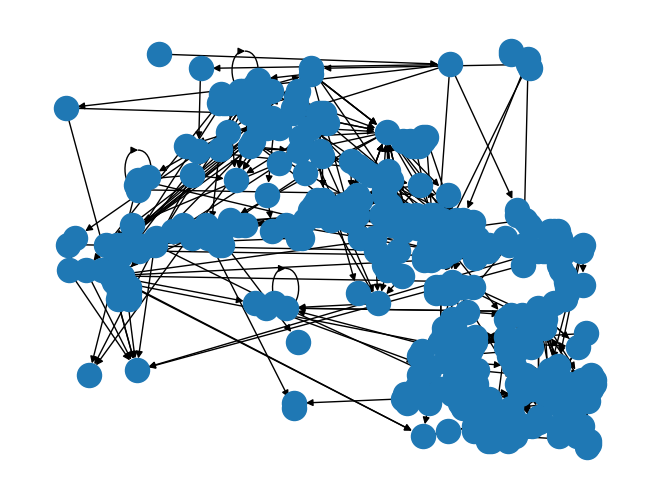

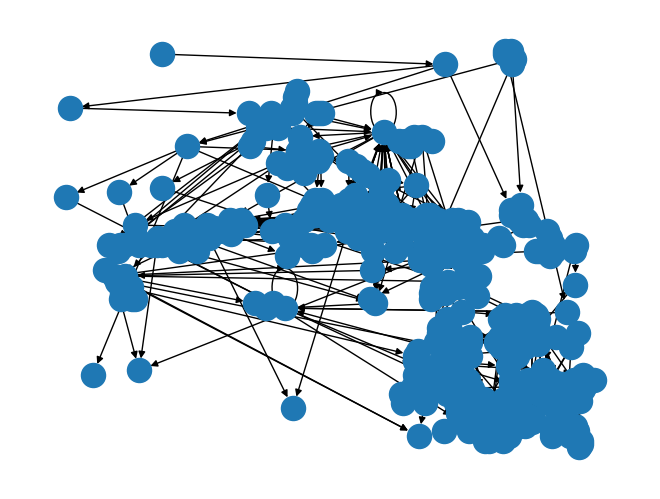

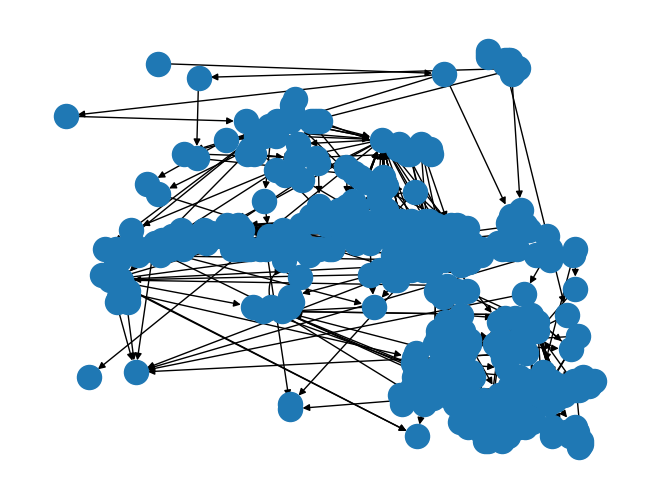

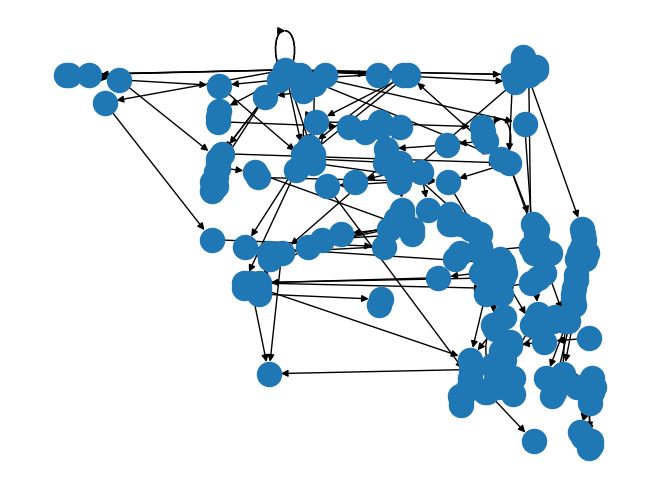

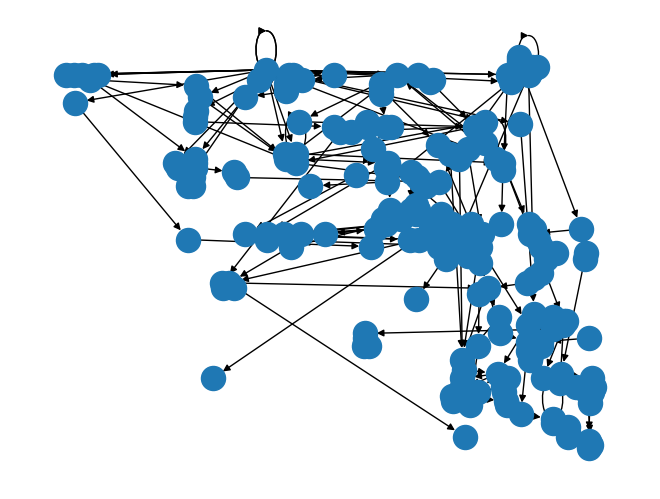

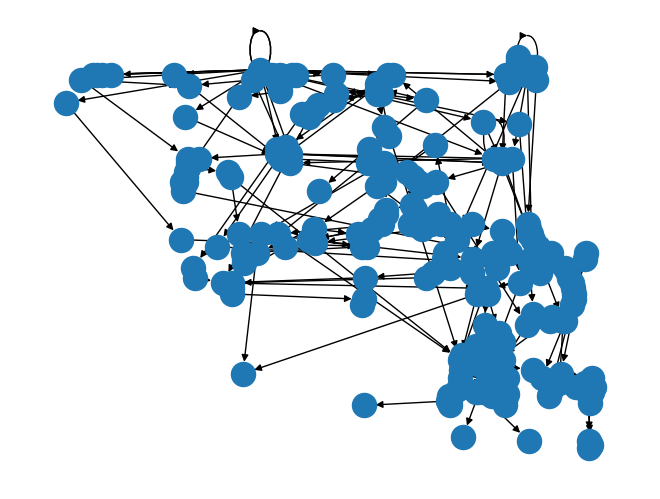

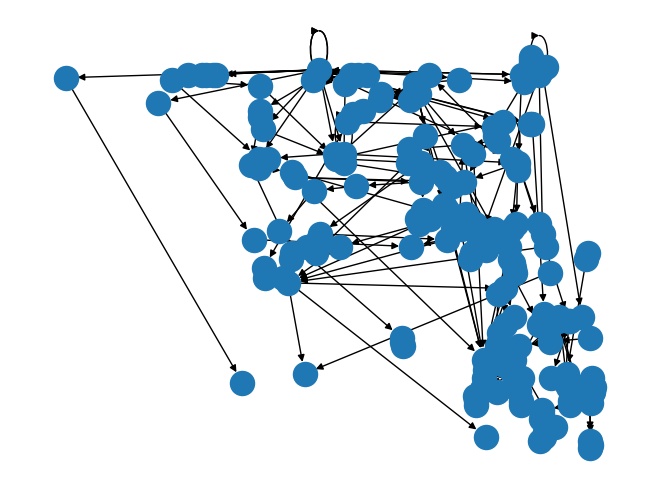

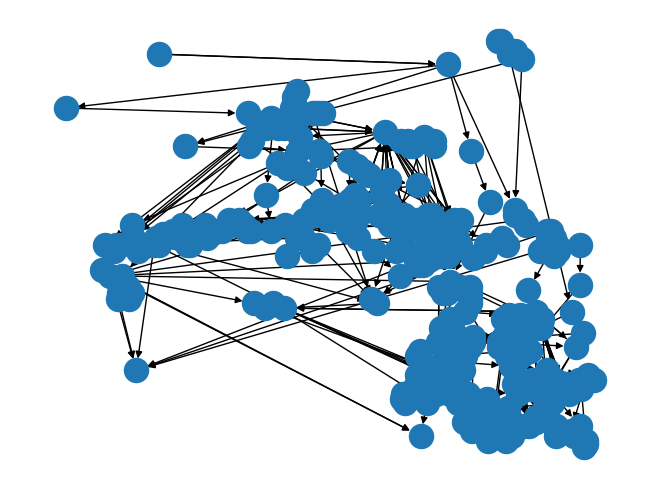

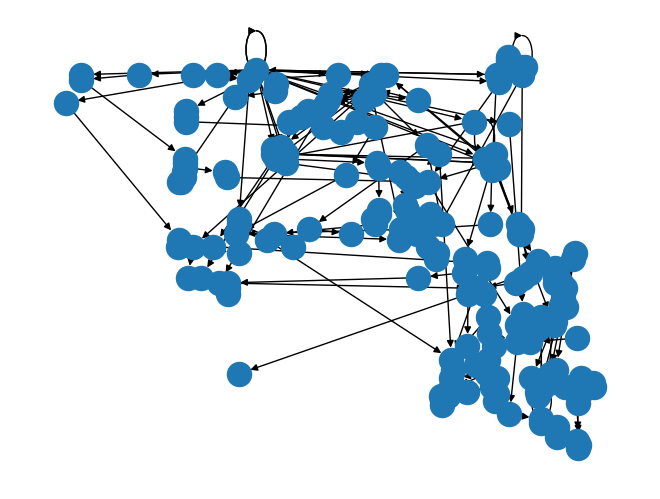

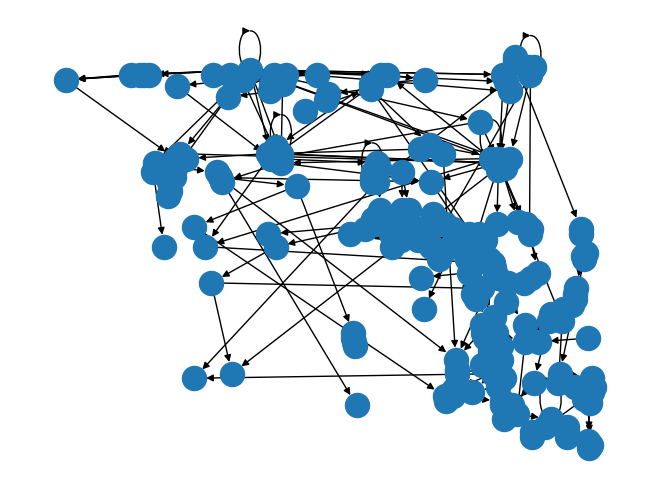

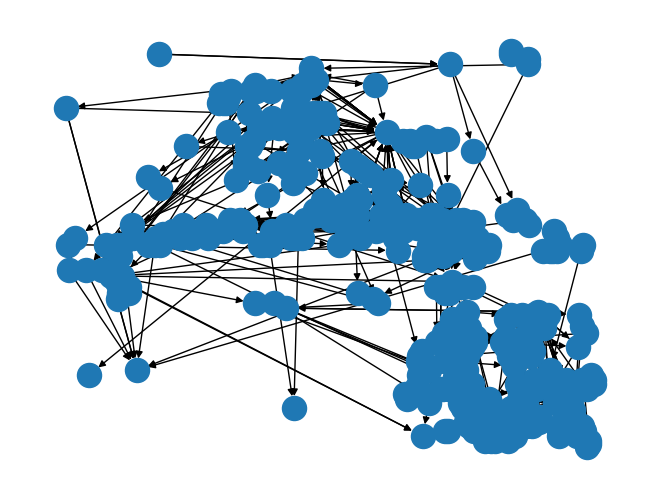

In [15]:
for graph in final_graphs:
    nx.draw(graph, pos_full, with_labels=False, arrows=True)
    plt.show()